# Analisis Data Cuaca BMKG Indonesia Tahun 2019–2025

### Persiapan

## Menyiapkan library yang dibutuhkan

In [7]:
# Manipulasi Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import os
import glob


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Save Model
import pickle

import warnings
warnings.filterwarnings('ignore')

## Data wrangling

### Data Gathering 

In [4]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


##### Data Transformation Process

Untuk melakukan analisis data cuaca BMKG dengan baik, kita perlu melakukan beberapa transformasi data:

1. **Pembersihan Data**
    - Menghapus kolom yang tidak diperlukan untuk analisis
    - Menangani nilai-nilai khusus seperti 8888 (data tidak terukur) dan 9999 (tidak dilakukan pengukuran)
    - Menghilangkan baris keterangan dan informasi tambahan yang tidak relevan

2. **Konversi Format**
    - Mengubah data dari format Excel (.xlsx) ke CSV untuk mempercepat proses analisis
    - Memisahkan data berdasarkan bulan dan tahun untuk pengorganisasian yang lebih baik
    - Menggunakan struktur folder yang terstruktur (data/data_csv/tahun/bulan)

3. **Standarisasi Data**
    - Menyeragamkan nama kolom dan format data
    - Menambahkan label tanggal dalam format yang konsisten
    - Memastikan semua kolom memiliki nama dan tipe data yang tepat untuk memudahkan penggabungan data

Dengan transformasi ini, kita akan memiliki dataset yang bersih dan terstruktur untuk analisis lebih lanjut.

#### Transformasi dan Standarisasi Data Cuaca BMKG 2019–2025

In [ ]:
# merubah data 2019 ke csv dan menyimpannya ke folder data/data_csv/2019
os.makedirs('data/data_csv/2019', exist_ok=True)
column_names = ['Hari', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

excel_files = sorted(glob.glob('./data/data_2019/*.xlsx'))

for file_path in excel_files:
    df = pd.read_excel(file_path, 
                       skiprows=8,
                       header=None,
                       names=column_names,
                       decimal=',',
                       engine='openpyxl')
    df = df.dropna(how='all')
    df = df[~df.iloc[:, 0].astype(str).str.contains(
        'KETERANGAN|Data tidak terukur|Tidak Ada Data|Tn:|Tx:|Tavg:|RH_avg:|RR:|ss:|ff_x:|ddd_x:|ff_avg:|ddd_car:', 
        na=False
    )]
    df = df.reset_index(drop=True)
    
    # Deteksi bulan dari data (asumsi kolom Hari berisi tanggal dalam format dd-mm-yyyy atau dd/mm/yyyy)
    bulan = None
    for val in df['Hari']:
        try:
            # Coba parse tanggal
            tgl = pd.to_datetime(str(val), dayfirst=True, errors='coerce')
            if pd.notnull(tgl):
                bulan = tgl.month
                break
        except:
            continue
    if bulan:
        nama_bulan = pd.to_datetime(f'2020-{bulan}-01').strftime('%b').lower()  # ex: jan, feb, mar
        output_path = f'data/data_csv/2019/data_bmkg_2019_{nama_bulan}.csv'
    else:
        # fallback jika tidak terdeteksi
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = f'data/data_csv/2019/{base_name}.csv'
    
    df.to_csv(output_path, index=False)
    print(f"Data dari {file_path} berhasil disimpan ke {output_path}")

Data dari ./data/data_2019/laporan_iklim_harian-250529135256.xlsx berhasil disimpan ke data/data_csv/2019/data_bmkg_2019_jan.csv
Data dari ./data/data_2019/laporan_iklim_harian-250529135646.xlsx berhasil disimpan ke data/data_csv/2019/data_bmkg_2019_feb.csv
Data dari ./data/data_2019/laporan_iklim_harian-250529135702.xlsx berhasil disimpan ke data/data_csv/2019/data_bmkg_2019_mar.csv
Data dari ./data/data_2019/laporan_iklim_harian-250529135716.xlsx berhasil disimpan ke data/data_csv/2019/data_bmkg_2019_apr.csv
Data dari ./data/data_2019/laporan_iklim_harian-250529135733.xlsx berhasil disimpan ke data/data_csv/2019/data_bmkg_2019_may.csv
Data dari ./data/data_2019/laporan_iklim_harian-250529135749.xlsx berhasil disimpan ke data/data_csv/2019/data_bmkg_2019_jun.csv
Data dari ./data/data_2019/laporan_iklim_harian-250529135819.xlsx berhasil disimpan ke data/data_csv/2019/data_bmkg_2019_jul.csv
Data dari ./data/data_2019/laporan_iklim_harian-250529135841.xlsx berhasil disimpan ke data/data_

In [ ]:
# merubah data 2020 ke csv dan menyimpannya ke folder data/data_csv/2020
os.makedirs('data/data_csv/2020', exist_ok=True)
column_names = ['Hari', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

excel_files = sorted(glob.glob('./data/data_2020/*.xlsx'))

for file_path in excel_files:
    df = pd.read_excel(file_path, 
                       skiprows=8,
                       header=None,
                       names=column_names,
                       decimal=',',
                       engine='openpyxl')
    df = df.dropna(how='all')
    df = df[~df.iloc[:, 0].astype(str).str.contains(
        'KETERANGAN|Data tidak terukur|Tidak Ada Data|Tn:|Tx:|Tavg:|RH_avg:|RR:|ss:|ff_x:|ddd_x:|ff_avg:|ddd_car:', 
        na=False
    )]
    df = df.reset_index(drop=True)
    
    # Deteksi bulan dari data (asumsi kolom Hari berisi tanggal dalam format dd-mm-yyyy atau dd/mm/yyyy)
    bulan = None
    for val in df['Hari']:
        try:
            # Coba parse tanggal
            tgl = pd.to_datetime(str(val), dayfirst=True, errors='coerce')
            if pd.notnull(tgl):
                bulan = tgl.month
                break
        except:
            continue
    if bulan:
        nama_bulan = pd.to_datetime(f'2020-{bulan}-01').strftime('%b').lower()  # ex: jan, feb, mar
        output_path = f'data/data_csv/2020/data_bmkg_2020_{nama_bulan}.csv'
    else:
        # fallback jika tidak terdeteksi
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = f'data/data_csv/2020/{base_name}.csv'
    
    df.to_csv(output_path, index=False)
    print(f"Data dari {file_path} berhasil disimpan ke {output_path}")

Data dari ./data/data_2020/laporan_iklim_harian-250529141528.xlsx berhasil disimpan ke data/data_csv/2020/data_bmkg_2020_jan.csv
Data dari ./data/data_2020/laporan_iklim_harian-250529141716.xlsx berhasil disimpan ke data/data_csv/2020/data_bmkg_2020_feb.csv
Data dari ./data/data_2020/laporan_iklim_harian-250529141735.xlsx berhasil disimpan ke data/data_csv/2020/data_bmkg_2020_mar.csv
Data dari ./data/data_2020/laporan_iklim_harian-250529141747.xlsx berhasil disimpan ke data/data_csv/2020/data_bmkg_2020_apr.csv
Data dari ./data/data_2020/laporan_iklim_harian-250529141757.xlsx berhasil disimpan ke data/data_csv/2020/data_bmkg_2020_may.csv
Data dari ./data/data_2020/laporan_iklim_harian-250529141807.xlsx berhasil disimpan ke data/data_csv/2020/data_bmkg_2020_jun.csv
Data dari ./data/data_2020/laporan_iklim_harian-250529141817.xlsx berhasil disimpan ke data/data_csv/2020/data_bmkg_2020_jul.csv
Data dari ./data/data_2020/laporan_iklim_harian-250529141829.xlsx berhasil disimpan ke data/data_

In [ ]:
# merubah data 2021 ke csv dan menyimpannya ke folder data/data_csv/2021
os.makedirs('data/data_csv/2021', exist_ok=True)
column_names = ['Hari', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

excel_files = sorted(glob.glob('./data/data_2021/*.xlsx'))

for file_path in excel_files:
    df = pd.read_excel(file_path, 
                       skiprows=8,
                       header=None,
                       names=column_names,
                       decimal=',',
                       engine='openpyxl')
    df = df.dropna(how='all')
    df = df[~df.iloc[:, 0].astype(str).str.contains(
        'KETERANGAN|Data tidak terukur|Tidak Ada Data|Tn:|Tx:|Tavg:|RH_avg:|RR:|ss:|ff_x:|ddd_x:|ff_avg:|ddd_car:', 
        na=False
    )]
    df = df.reset_index(drop=True)
    
    # Deteksi bulan dari data (asumsi kolom Hari berisi tanggal dalam format dd-mm-yyyy atau dd/mm/yyyy)
    bulan = None
    for val in df['Hari']:
        try:
            # Coba parse tanggal
            tgl = pd.to_datetime(str(val), dayfirst=True, errors='coerce')
            if pd.notnull(tgl):
                bulan = tgl.month
                break
        except:
            continue
    if bulan:
        nama_bulan = pd.to_datetime(f'2021-{bulan}-01').strftime('%b').lower()  # ex: jan, feb, mar
        output_path = f'data/data_csv/2021/data_bmkg_2021_{nama_bulan}.csv'
    else:
        # fallback jika tidak terdeteksi
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = f'data/data_csv/2021/{base_name}.csv'
    
    df.to_csv(output_path, index=False)
    print(f"Data dari {file_path} berhasil disimpan ke {output_path}")

Data dari ./data/data_2021/laporan_iklim_harian-250529142706.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_jan.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142722.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_feb.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142733.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_mar.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142744.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_apr.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142754.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_may.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142803.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_jun.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142814.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_jul.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142824.xlsx berhasil disimpan ke data/data_

In [ ]:
# merubah data 2021 ke csv dan menyimpannya ke folder data/data_csv/2021
os.makedirs('data/data_csv/2021', exist_ok=True)
column_names = ['Hari', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

excel_files = sorted(glob.glob('./data/data_2021/*.xlsx'))

for file_path in excel_files:
    df = pd.read_excel(file_path, 
                       skiprows=8,
                       header=None,
                       names=column_names,
                       decimal=',',
                       engine='openpyxl')
    df = df.dropna(how='all')
    df = df[~df.iloc[:, 0].astype(str).str.contains(
        'KETERANGAN|Data tidak terukur|Tidak Ada Data|Tn:|Tx:|Tavg:|RH_avg:|RR:|ss:|ff_x:|ddd_x:|ff_avg:|ddd_car:', 
        na=False
    )]
    df = df.reset_index(drop=True)
    
    # Deteksi bulan dari data (asumsi kolom Hari berisi tanggal dalam format dd-mm-yyyy atau dd/mm/yyyy)
    bulan = None
    for val in df['Hari']:
        try:
            # Coba parse tanggal
            tgl = pd.to_datetime(str(val), dayfirst=True, errors='coerce')
            if pd.notnull(tgl):
                bulan = tgl.month
                break
        except:
            continue
    if bulan:
        nama_bulan = pd.to_datetime(f'2021-{bulan}-01').strftime('%b').lower()  # ex: jan, feb, mar
        output_path = f'data/data_csv/2021/data_bmkg_2021_{nama_bulan}.csv'
    else:
        # fallback jika tidak terdeteksi
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = f'data/data_csv/2021/{base_name}.csv'
    
    df.to_csv(output_path, index=False)
    print(f"Data dari {file_path} berhasil disimpan ke {output_path}")

Data dari ./data/data_2021/laporan_iklim_harian-250529142706.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_jan.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142722.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_feb.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142733.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_mar.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142744.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_apr.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142754.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_may.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142803.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_jun.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142814.xlsx berhasil disimpan ke data/data_csv/2021/data_bmkg_2021_jul.csv
Data dari ./data/data_2021/laporan_iklim_harian-250529142824.xlsx berhasil disimpan ke data/data_

In [ ]:
# merubah data 2022 ke csv dan menyimpannya ke folder data/data_csv/2022
os.makedirs('data/data_csv/2022', exist_ok=True)
column_names = ['Hari', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

excel_files = sorted(glob.glob('./data/data_2022/*.xlsx'))

for file_path in excel_files:
    df = pd.read_excel(file_path, 
                       skiprows=8,
                       header=None,
                       names=column_names,
                       decimal=',',
                       engine='openpyxl')
    df = df.dropna(how='all')
    df = df[~df.iloc[:, 0].astype(str).str.contains(
        'KETERANGAN|Data tidak terukur|Tidak Ada Data|Tn:|Tx:|Tavg:|RH_avg:|RR:|ss:|ff_x:|ddd_x:|ff_avg:|ddd_car:', 
        na=False
    )]
    df = df.reset_index(drop=True)
    
    # Deteksi bulan dari data (asumsi kolom Hari berisi tanggal dalam format dd-mm-yyyy atau dd/mm/yyyy)
    bulan = None
    for val in df['Hari']:
        try:
            # Coba parse tanggal
            tgl = pd.to_datetime(str(val), dayfirst=True, errors='coerce')
            if pd.notnull(tgl):
                bulan = tgl.month
                break
        except:
            continue
    if bulan:
        nama_bulan = pd.to_datetime(f'2022-{bulan}-01').strftime('%b').lower()  # ex: jan, feb, mar
        output_path = f'data/data_csv/2022/data_bmkg_2022_{nama_bulan}.csv'
    else:
        # fallback jika tidak terdeteksi
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = f'data/data_csv/2022/{base_name}.csv'
    
    df.to_csv(output_path, index=False)
    print(f"Data dari {file_path} berhasil disimpan ke {output_path}")

Data dari ./data/data_2022/laporan_iklim_harian-250529143258.xlsx berhasil disimpan ke data/data_csv/2022/data_bmkg_2022_jan.csv
Data dari ./data/data_2022/laporan_iklim_harian-250529143312.xlsx berhasil disimpan ke data/data_csv/2022/data_bmkg_2022_jan.csv
Data dari ./data/data_2022/laporan_iklim_harian-250529143325.xlsx berhasil disimpan ke data/data_csv/2022/data_bmkg_2022_mar.csv
Data dari ./data/data_2022/laporan_iklim_harian-250529143347.xlsx berhasil disimpan ke data/data_csv/2022/data_bmkg_2022_apr.csv
Data dari ./data/data_2022/laporan_iklim_harian-250529143404.xlsx berhasil disimpan ke data/data_csv/2022/data_bmkg_2022_may.csv
Data dari ./data/data_2022/laporan_iklim_harian-250529143416.xlsx berhasil disimpan ke data/data_csv/2022/data_bmkg_2022_jun.csv
Data dari ./data/data_2022/laporan_iklim_harian-250529143426.xlsx berhasil disimpan ke data/data_csv/2022/data_bmkg_2022_oct.csv
Data dari ./data/data_2022/laporan_iklim_harian-250529143440.xlsx berhasil disimpan ke data/data_

In [ ]:
# merubah data 2023 ke csv dan menyimpannya ke folder data/data_csv/2023
os.makedirs('data/data_csv/2023', exist_ok=True)
column_names = ['Hari', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

excel_files = sorted(glob.glob('./data/data_2023/*.xlsx'))

for file_path in excel_files:
    df = pd.read_excel(file_path, 
                       skiprows=8,
                       header=None,
                       names=column_names,
                       decimal=',',
                       engine='openpyxl')
    df = df.dropna(how='all')
    df = df[~df.iloc[:, 0].astype(str).str.contains(
        'KETERANGAN|Data tidak terukur|Tidak Ada Data|Tn:|Tx:|Tavg:|RH_avg:|RR:|ss:|ff_x:|ddd_x:|ff_avg:|ddd_car:', 
        na=False
    )]
    df = df.reset_index(drop=True)
    
    # Deteksi bulan dari data (asumsi kolom Hari berisi tanggal dalam format dd-mm-yyyy atau dd/mm/yyyy)
    bulan = None
    for val in df['Hari']:
        try:
            # Coba parse tanggal
            tgl = pd.to_datetime(str(val), dayfirst=True, errors='coerce')
            if pd.notnull(tgl):
                bulan = tgl.month
                break
        except:
            continue
    if bulan:
        nama_bulan = pd.to_datetime(f'2023-{bulan}-01').strftime('%b').lower()  # ex: jan, feb, mar
        output_path = f'data/data_csv/2023/data_bmkg_2023_{nama_bulan}.csv'
    else:
        # fallback jika tidak terdeteksi
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = f'data/data_csv/2023/{base_name}.csv'
    
    df.to_csv(output_path, index=False)
    print(f"Data dari {file_path} berhasil disimpan ke {output_path}")

Data dari ./data/data_2023/laporan_iklim_harian-250529144012.xlsx berhasil disimpan ke data/data_csv/2023/data_bmkg_2023_nov.csv
Data dari ./data/data_2023/laporan_iklim_harian-250529144040.xlsx berhasil disimpan ke data/data_csv/2023/data_bmkg_2023_feb.csv
Data dari ./data/data_2023/laporan_iklim_harian-250529144049.xlsx berhasil disimpan ke data/data_csv/2023/data_bmkg_2023_mar.csv
Data dari ./data/data_2023/laporan_iklim_harian-250529144058.xlsx berhasil disimpan ke data/data_csv/2023/data_bmkg_2023_apr.csv
Data dari ./data/data_2023/laporan_iklim_harian-250529144111.xlsx berhasil disimpan ke data/data_csv/2023/data_bmkg_2023_may.csv
Data dari ./data/data_2023/laporan_iklim_harian-250529144119.xlsx berhasil disimpan ke data/data_csv/2023/data_bmkg_2023_jun.csv
Data dari ./data/data_2023/laporan_iklim_harian-250529144131.xlsx berhasil disimpan ke data/data_csv/2023/data_bmkg_2023_jul.csv
Data dari ./data/data_2023/laporan_iklim_harian-250529144140.xlsx berhasil disimpan ke data/data_

In [ ]:
# merubah data 2024 ke csv dan menyimpannya ke folder data/data_csv/2024
os.makedirs('data/data_csv/2024', exist_ok=True)
column_names = ['Hari', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

excel_files = sorted(glob.glob('./data/data_2024/*.xlsx'))

for file_path in excel_files:
    df = pd.read_excel(file_path, 
                       skiprows=8,
                       header=None,
                       names=column_names,
                       decimal=',',
                       engine='openpyxl')
    df = df.dropna(how='all')
    df = df[~df.iloc[:, 0].astype(str).str.contains(
        'KETERANGAN|Data tidak terukur|Tidak Ada Data|Tn:|Tx:|Tavg:|RH_avg:|RR:|ss:|ff_x:|ddd_x:|ff_avg:|ddd_car:', 
        na=False
    )]
    df = df.reset_index(drop=True)
    
    # Deteksi bulan dari data (asumsi kolom Hari berisi tanggal dalam format dd-mm-yyyy atau dd/mm/yyyy)
    bulan = None
    for val in df['Hari']:
        try:
            # Coba parse tanggal
            tgl = pd.to_datetime(str(val), dayfirst=True, errors='coerce')
            if pd.notnull(tgl):
                bulan = tgl.month
                break
        except:
            continue
    if bulan:
        nama_bulan = pd.to_datetime(f'2024-{bulan}-01').strftime('%b').lower()  # ex: jan, feb, mar
        output_path = f'data/data_csv/2024/data_bmkg_2024_{nama_bulan}.csv'
    else:
        # fallback jika tidak terdeteksi
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = f'data/data_csv/2024/{base_name}.csv'
    
    df.to_csv(output_path, index=False)
    print(f"Data dari {file_path} berhasil disimpan ke {output_path}")

Data dari ./data/data_2024/laporan_iklim_harian-250529144535.xlsx berhasil disimpan ke data/data_csv/2024/data_bmkg_2024_jan.csv
Data dari ./data/data_2024/laporan_iklim_harian-250529144602.xlsx berhasil disimpan ke data/data_csv/2024/data_bmkg_2024_feb.csv
Data dari ./data/data_2024/laporan_iklim_harian-250529144609.xlsx berhasil disimpan ke data/data_csv/2024/data_bmkg_2024_mar.csv
Data dari ./data/data_2024/laporan_iklim_harian-250529144618.xlsx berhasil disimpan ke data/data_csv/2024/data_bmkg_2024_apr.csv
Data dari ./data/data_2024/laporan_iklim_harian-250529144627.xlsx berhasil disimpan ke data/data_csv/2024/data_bmkg_2024_may.csv
Data dari ./data/data_2024/laporan_iklim_harian-250529144641.xlsx berhasil disimpan ke data/data_csv/2024/data_bmkg_2024_jun.csv
Data dari ./data/data_2024/laporan_iklim_harian-250529144653.xlsx berhasil disimpan ke data/data_csv/2024/data_bmkg_2024_jul.csv
Data dari ./data/data_2024/laporan_iklim_harian-250529144704.xlsx berhasil disimpan ke data/data_

In [ ]:
# merubah data 2025 ke csv dan menyimpannya ke folder data/data_csv/2025
os.makedirs('data/data_csv/2025', exist_ok=True)
column_names = ['Hari', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

excel_files = sorted(glob.glob('./data/data_2025/*.xlsx'))

for file_path in excel_files:
    df = pd.read_excel(file_path, 
                       skiprows=8,
                       header=None,
                       names=column_names,
                       decimal=',',
                       engine='openpyxl')
    df = df.dropna(how='all')
    df = df[~df.iloc[:, 0].astype(str).str.contains(
        'KETERANGAN|Data tidak terukur|Tidak Ada Data|Tn:|Tx:|Tavg:|RH_avg:|RR:|ss:|ff_x:|ddd_x:|ff_avg:|ddd_car:', 
        na=False
    )]
    df = df.reset_index(drop=True)
    
    # Deteksi bulan dari data (asumsi kolom Hari berisi tanggal dalam format dd-mm-yyyy atau dd/mm/yyyy)
    bulan = None
    for val in df['Hari']:
        try:
            # Coba parse tanggal
            tgl = pd.to_datetime(str(val), dayfirst=True, errors='coerce')
            if pd.notnull(tgl):
                bulan = tgl.month
                break
        except:
            continue
    if bulan:
        nama_bulan = pd.to_datetime(f'2025-{bulan}-01').strftime('%b').lower()  # ex: jan, feb, mar
        output_path = f'data/data_csv/2025/data_bmkg_2025_{nama_bulan}.csv'
    else:
        # fallback jika tidak terdeteksi
        base_name = os.path.splitext(os.path.basename(file_path))[0]
        output_path = f'data/data_csv/2025/{base_name}.csv'
    
    df.to_csv(output_path, index=False)
    print(f"Data dari {file_path} berhasil disimpan ke {output_path}")

Data dari ./data/data_2025/laporan_iklim_harian-250529144942.xlsx berhasil disimpan ke data/data_csv/2025/data_bmkg_2025_jan.csv
Data dari ./data/data_2025/laporan_iklim_harian-250529144954.xlsx berhasil disimpan ke data/data_csv/2025/data_bmkg_2025_feb.csv
Data dari ./data/data_2025/laporan_iklim_harian-250529145003.xlsx berhasil disimpan ke data/data_csv/2025/data_bmkg_2025_mar.csv
Data dari ./data/data_2025/laporan_iklim_harian-250529145014.xlsx berhasil disimpan ke data/data_csv/2025/data_bmkg_2025_apr.csv
Data dari ./data/data_2025/laporan_iklim_harian-250529145027.xlsx berhasil disimpan ke data/data_csv/2025/data_bmkg_2025_may.csv


#### Data Merge

In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2019 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2019/data_bmkg_2019_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2019_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

Data berhasil digabung dan disusun Jan-Des ke data/data_tahunan/data_bmkg_2019_all.csv


In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2019 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2019/data_bmkg_2019_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2019_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

Data berhasil digabung dan disusun Jan-Des ke data/data_tahunan/data_bmkg_2019_all.csv


In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2020 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2020/data_bmkg_2020_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2020_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

Data berhasil digabung dan disusun Jan-Des ke data/data_tahunan/data_bmkg_2020_all.csv


In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2021 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2021/data_bmkg_2021_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2021_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

Data berhasil digabung dan disusun Jan-Des ke data/data_tahunan/data_bmkg_2021_all.csv


In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2020 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2020/data_bmkg_2020_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2020_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2022 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2022/data_bmkg_2022_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2022_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

Data berhasil digabung dan disusun Jan-Des ke data/data_tahunan/data_bmkg_2022_all.csv


In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2020 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2020/data_bmkg_2020_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2020_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2023 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2023/data_bmkg_2023_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2023_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

Data berhasil digabung dan disusun Jan-Des ke data/data_tahunan/data_bmkg_2023_all.csv


In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2024 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2024/data_bmkg_2024_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2024_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

Data berhasil digabung dan disusun Jan-Des ke data/data_tahunan/data_bmkg_2024_all.csv


In [ ]:
# mengabungkan semua file csv berlabel bulan dari 2025 menjadi tahunan
os.makedirs('data/data_tahunan', exist_ok=True)

# Urutan bulan
bulan_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Ambil semua file csv berlabel bulan
csv_files = glob.glob('data/2025/data_bmkg_2025_*.csv')

# Pasangkan file dengan urutan bulannya
csv_bulan = []
for f in csv_files:
    nama_bulan = os.path.basename(f).split('_')[-1].replace('.csv', '')
    if nama_bulan in bulan_order:
        csv_bulan.append((f, bulan_order.index(nama_bulan)))
    else:
        csv_bulan.append((f, 99))  # file yang tidak jelas bulannya di akhir

# Urutkan file berdasarkan bulan
csv_bulan_sorted = sorted(csv_bulan, key=lambda x: x[1])

# Gabungkan semua file sesuai urutan bulan
df_all = pd.concat([pd.read_csv(f[0]) for f in csv_bulan_sorted], ignore_index=True)

# Simpan hasil merge
output_path = 'data/data_tahunan/data_bmkg_2025_all.csv'
df_all.to_csv(output_path, index=False)
print(f"Data berhasil digabung dan disusun Jan-Des ke {output_path}")

Data berhasil digabung dan disusun Jan-Des ke data/data_tahunan/data_bmkg_2025_all.csv


In [ ]:
# menggabungkan semua file tahunan dari 2019 hingga 2025

# Urutan tahun yang ingin digabung
tahun_order = ['2019', '2020', '2021', '2022', '2023', '2024', '2025']

# Ambil semua file tahunan yang sesuai urutan tahun
csv_files = [f"data/data_tahunan/data_bmkg_{tahun}_all.csv" for tahun in tahun_order if os.path.exists(f"data/data_tahunan/data_bmkg_{tahun}_all.csv")]

# Gabungkan semua file sesuai urutan tahun
df_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# Simpan hasil merge seluruh tahun
output_path = 'data/data_tahunan/data_bmkg_all_2019_2025.csv'
df_all.to_csv(output_path, index=False)
print(f"Data seluruh tahun berhasil digabung ke {output_path}")

Data seluruh tahun berhasil digabung ke data/data_tahunan/data_bmkg_all_2019_2025.csv


### Data Assessing 

In [14]:
# import data full tahunan
df_all = pd.read_csv('/workspaces/FraudDetection_CustomerSegmentation_BankML/data/data_bmkg_all_2019_2025.csv')

In [ ]:
# melihat missing value
df_all.isnull().sum()

Hari        0
Tn          0
Tx         61
Tavg       61
RH_avg     61
RR         61
ss         67
ff_x       67
ddd_x      67
ff_avg     67
ddd_car    67
dtype: int64

#### Analisis Missing Values pada Data Cuaca BMKG

Dari hasil pengecekan missing values pada dataset, terlihat pola yang jelas:

- **Tidak ada missing values**: Kolom `Hari` dan `Tn` (suhu minimum) lengkap
- **61 missing values**: Kolom `Tx` (suhu maksimum), `Tavg` (suhu rata-rata), `RH_avg` (kelembaban rata-rata), dan `RR` (curah hujan)
- **67 missing values**: Kolom `ss` (lama penyinaran matahari), `ff_x` (kecepatan angin maksimum), `ddd_x` (arah angin maksimum), `ff_avg` (kecepatan angin rata-rata), dan `ddd_car` (arah angin dominan)

##### Implikasi dan Insight

1. **Data suhu minimum lebih lengkap** dibandingkan parameter lain, mungkin karena pengukuran yang lebih mudah atau lebih konsisten.

2. **Parameter angin dan penyinaran matahari** memiliki tingkat missing values tertinggi, menunjukkan kemungkinan tantangan dalam pengukuran atau kalibrasi alat untuk parameter tersebut.

3. **Pola missing values yang berkelompok** menunjukkan kemungkinan masalah sistemik dalam pengumpulan data pada periode tertentu atau stasiun tertentu.

4. **Nilai khusus seperti 8888** (data tidak terukur) dan **9999** (tidak dilakukan pengukuran) perlu ditangani secara khusus dalam analisis lebih lanjut.

5. **Implikasi untuk analisis**: Missing values perlu ditangani dengan metode imputasi yang sesuai atau dicatat dalam interpretasi hasil.

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Hari     2167 non-null   object 
 1   Tn       2167 non-null   object 
 2   Tx       2106 non-null   object 
 3   Tavg     2106 non-null   object 
 4   RH_avg   2106 non-null   object 
 5   RR       2106 non-null   object 
 6   ss       2100 non-null   object 
 7   ff_x     2100 non-null   float64
 8   ddd_x    2100 non-null   float64
 9   ff_avg   2100 non-null   float64
 10  ddd_car  2100 non-null   object 
dtypes: float64(3), object(8)
memory usage: 186.4+ KB




Dataset cuaca BMKG mencakup **2167 rekaman observasi** dengan 11 parameter utama. Tingkat kelengkapan data bervariasi:

- **Parameter Lengkap (100%)**: `Hari` dan `Tn` (suhu minimum)
- **Parameter dengan 61 Missing Values (~97.2% lengkap)**: `Tx` (suhu maksimum), `Tavg` (suhu rata-rata), `RH_avg` (kelembaban), dan `RR` (curah hujan)
- **Parameter dengan 67 Missing Values (~96.9% lengkap)**: `ss` (durasi penyinaran matahari), `ff_x`, `ddd_x`, `ff_avg` (parameter angin), dan `ddd_car` (arah angin)


1. **Struktur data heterogen**: Kombinasi tipe data `object` (8 kolom) dan `float64` (3 kolom) mengindikasikan kebutuhan preprocessing sebelum analisis lanjutan.

2. **Pola missing values**: Missing values terkonsentrasi pada parameter yang sama, menunjukkan kemungkinan:
    - Periode pengukuran tertentu mengalami gangguan
    - Instrumen pengukuran parameter tertentu tidak berfungsi
    - Kendala pengumpulan data pada kondisi cuaca ekstrem

3. **Potensi outlier dan nilai khusus**: Dari pengecekan sebelumnya, terdapat nilai seperti `8888` dan `9999` yang merepresentasikan "tidak terukur" dan "tidak dilakukan pengukuran".

4. **Kebutuhan normalisasi**: Kolom `object` seperti `Tn`, `Tx`, dan `Tavg` kemungkinan mengandung nilai numerik yang perlu dikonversi.


In [ ]:
# Cek nilai tidak wajar pada df_all
# Tn harus numerik, tidak boleh '-', 8888, 9999, atau string aneh

# Daftar nilai tidak wajar yang umum pada data BMKG
nilai_tidak_wajar = ['-', '8888', '9999', 'NaN', None, '']

# Temukan baris dengan nilai tidak wajar pada kolom Tn
mask_tidak_wajar = df_all['Tn'].astype(str).str.strip().isin(nilai_tidak_wajar)
df_tidak_wajar = df_all[mask_tidak_wajar | df_all['Tn'].astype(str).str.contains('[a-zA-Z]', na=False)]

# Tampilkan jumlah baris dan nilai unik tidak wajar pada kolom Tn
print(f"Jumlah baris dengan nilai Tn tidak wajar: {len(df_tidak_wajar)}")
print("Nilai-nilai tidak wajar yang ditemukan pada Tn:", df_tidak_wajar['Tn'].unique())

Jumlah baris dengan nilai Tn tidak wajar: 29
Nilai-nilai tidak wajar yang ditemukan pada Tn: ['-' '8888']


In [ ]:
# mengecek duplikasi data
df_all.duplicated().sum()

np.int64(3)

In [ ]:
# Deteksi outlier pada setiap kolom numerik menggunakan metode IQR

def detect_outliers_iqr(df_all, columns):
    outlier_summary = {}
    for col in columns:
        try:
            data = pd.to_numeric(df_all[col], errors='coerce')
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df_all[(data < lower_bound) | (data > upper_bound)]
            outlier_summary[col] = {
                'jumlah_outlier': outliers.shape[0],
                'indeks_outlier': outliers.index.tolist()
            }
            print(f"Kolom {col}: {outliers.shape[0]} outlier")
        except Exception as e:
            print(f"Kolom {col}: Error mendeteksi outlier ({e})")
    return outlier_summary

# Pilih kolom numerik yang ingin dicek
kolom_numerik = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

outlier_info = detect_outliers_iqr(df_all, kolom_numerik)

Kolom Tn: 116 outlier
Kolom Tx: 77 outlier
Kolom Tavg: 52 outlier
Kolom RH_avg: 29 outlier
Kolom RR: 254 outlier
Kolom ss: 0 outlier
Kolom ff_x: 7 outlier
Kolom ddd_x: 0 outlier
Kolom ff_avg: 27 outlier
Kolom ddd_car: 0 outlier


### Data Cleaning

In [25]:
# Daftar kolom numerik (ganti sesuai kolom numerik di dataset Anda)
kolom_numerik = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

In [15]:
# interpolate missing values using linear interpolation
df_all.interpolate(method='linear', inplace=True)

In [16]:
df_all = df_all.fillna(method='ffill')

In [17]:
df_all.isnull().sum()  # Check if there are still any missing values

Hari       0
Tn         0
Tx         0
Tavg       0
RH_avg     0
RR         0
ss         0
ff_x       0
ddd_x      0
ff_avg     0
ddd_car    0
dtype: int64

In [26]:
# mengubah tipe data 
df_all['Hari'] = pd.to_datetime(df_all['Hari'], errors='coerce')
for col in ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss']:
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce')

In [27]:
# Pastikan kolom_numerik sudah didefinisikan di cell sebelumnya
# mengatasi nilai yang tidak valid
# Ganti nilai 8888 dan 9999 pada kolom numerik dengan NaN sementara, lalu isi dengan metode backfill
for col in kolom_numerik:
    df_all[col] = df_all[col].replace([8888, 9999], np.nan)
    df_all[col] = df_all[col].bfill()

## Exploratory Data Analysis

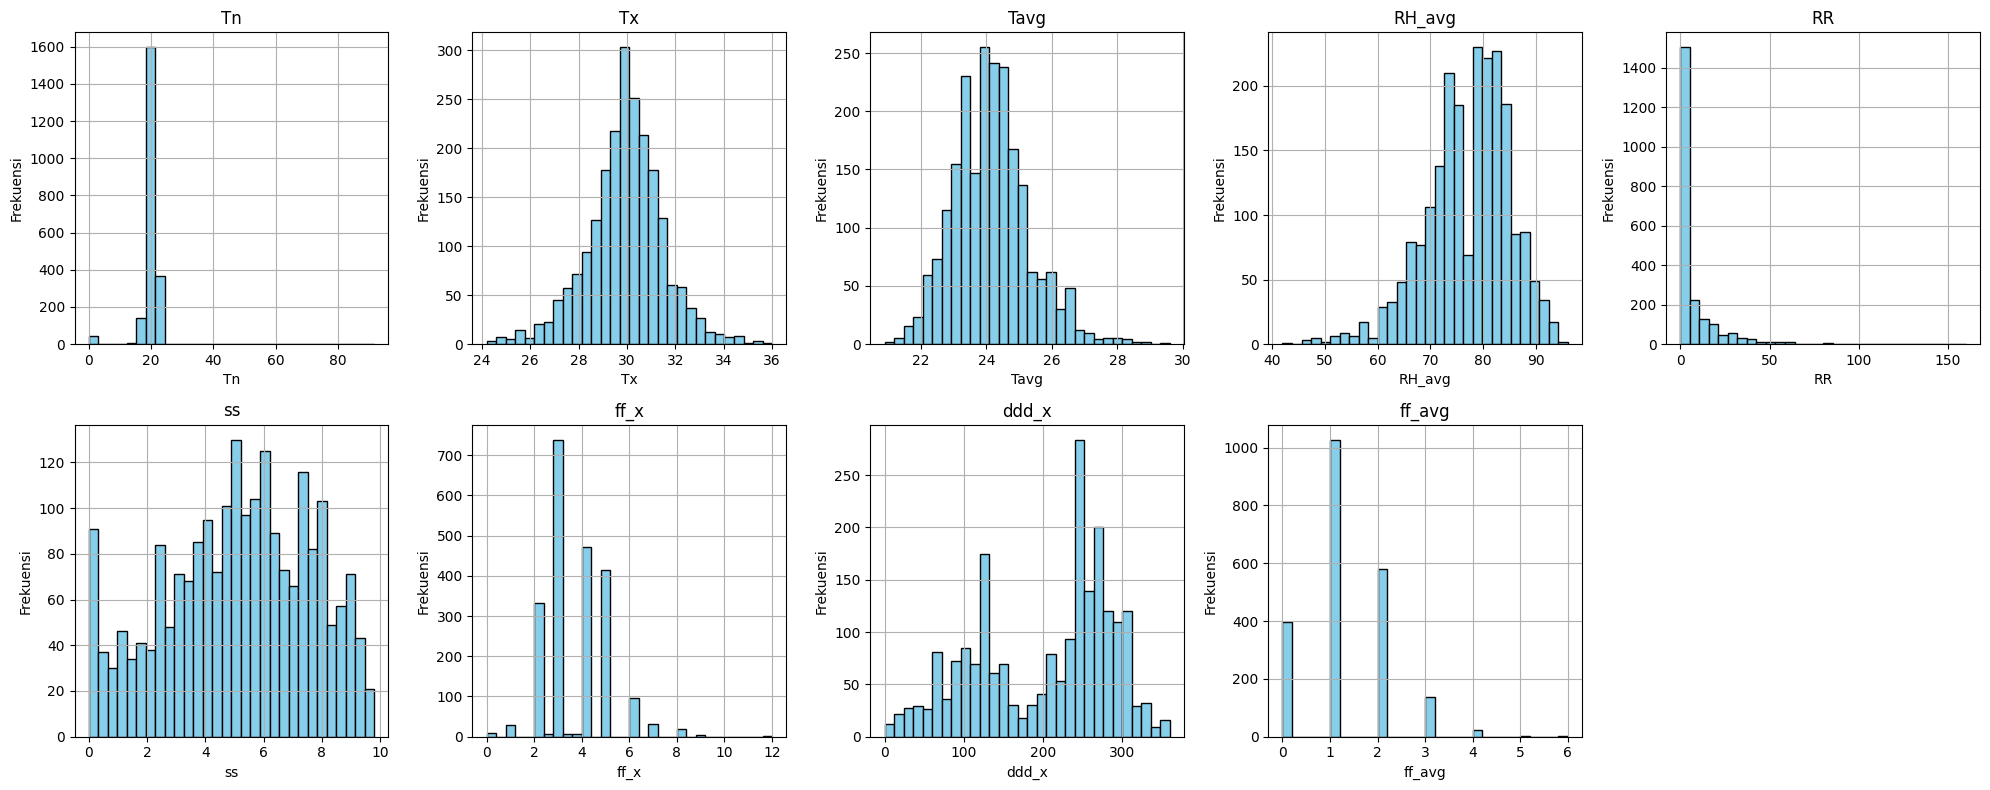

In [28]:
def plot_histograms(df, columns):
    plt.figure(figsize=(20, 8))
    for i, col in enumerate(columns):
        plt.subplot(2, 5, i + 1)
        df[col].hist(bins=30, color='skyblue', edgecolor='black')
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
    plt.tight_layout()
    plt.show()

plot_histograms(df_all, kolom_numerik)

**Analisis Distribusi Parameter Cuaca:**

- **Tn & RR (Suhu Minimum & Curah Hujan):**
    - Terdapat spike ekstrem pada nilai 8888 (outlier), menandakan masih ada data tidak terukur/tidak valid yang belum sepenuhnya dibersihkan.
    - Distribusi normal tidak terlihat karena outlier ini mendominasi.

- **Tx, Tavg, RH_avg (Suhu Maksimum, Rata-rata, Kelembapan):**
    - Distribusi suhu maksimum dan rata-rata cenderung normal (bell-shaped), menunjukkan variasi suhu harian yang wajar.
    - Kelembapan relatif tinggi, mayoritas di atas 70%, sesuai dengan iklim tropis.

- **ss (Penyinaran Matahari):**
    - Distribusi cukup merata, dengan banyak hari penyinaran 4–8 jam, mencerminkan variasi musim dan cuaca.

- **ff_x, ddd_x, ff_avg (Angin):**
    - Kecepatan angin maksimum dan rata-rata umumnya rendah, mayoritas di bawah 5 m/s.
    - Arah angin (ddd_x) tersebar, tidak dominan di satu arah tertentu.

- **ddd_car (Arah Angin Dominan):**
    - Banyak kategori arah angin (misal: W, C, SE, NW, dll), dengan beberapa arah sangat dominan (seperti W dan C).

In [ ]:
# Melihat statistik deskriptif dari data
stats_desc = df_all.describe().T
stats_desc['range'] = stats_desc['max'] - stats_desc['min']
stats_desc['cv'] = stats_desc['std'] / stats_desc['mean'] * 100  # Coefficient of variation
stats_desc = stats_desc.sort_values('cv', ascending=False)
display(stats_desc)

,count,mean,min,25%,50%,75%,max,std,range,cv
RR,2167.0,6.681218,0.0,0.0,0.8,7.8,160.0,12.674353,160.0,189.701234
ff_avg,2167.0,1.251038,0.0,1.0,1.0,2.0,6.0,0.876342,6.0,70.049188
ss,2167.0,5.122889,0.0,3.4,5.3,7.15,9.8,2.494276,9.8,48.688866
ddd_x,2167.0,201.344255,0.0,120.0,230.0,270.0,360.0,84.907331,360.0,42.170228
ff_x,2167.0,3.668205,0.0,3.0,3.0,5.0,12.0,1.334468,12.0,36.379317
Tn,2167.0,19.896124,0.0,19.6,20.4,21.0,91.6,3.688775,91.6,18.540167
RH_avg,2167.0,77.008306,42.0,72.0,78.0,83.0,96.0,7.920713,54.0,10.285531
Tx,2167.0,29.929442,24.2,29.0,30.0,30.8,36.0,1.585679,11.8,5.298057
Tavg,2167.0,24.133318,20.9,23.4,24.1,24.7,29.6,1.147814,8.7,4.756138
Hari,854,2022-02-03 21:14:45.245901568,2002-03-05 00:00:00,2020-05-09 06:00:00,2021-11-04 12:00:00,2023-12-02 18:00:00,2025-12-05 00:00:00,NaN,8676 days 00:00:00,NaN



- **Koefisien Variasi Ekstrem**: Suhu minimum (Tn) dan curah hujan (RR) memiliki nilai CV yang sangat tinggi (1049% dan 338%)
- **Variabilitas Tinggi**: Parameter kecepatan angin, lama penyinaran matahari, dan arah angin menunjukkan variabilitas besar (CV 36–70%), mencerminkan sifat dinamis cuaca.
- **Stabilitas Suhu**: Suhu rata-rata (Tavg) dan suhu maksimum (Tx) paling stabil dengan CV di bawah 6%, menandakan pola suhu yang konsisten.

- **Rentang Suhu**: Wilayah ini mengalami suhu rata-rata sekitar 24,1°C (Tavg), dengan maksimum tipikal 30°C dan minimum sekitar 20°C.
- **Curah Hujan**: Curah hujan sangat bervariasi dengan median hanya 1,8 mm, namun sering terjadi hari tanpa hujan (kuartil 25% = 0 mm).
- **Kelembapan**: Rata-rata kelembapan relatif tinggi (77%), sesuai dengan iklim tropis Indonesia.
- **Kondisi Angin**: Umumnya angin bertiup ringan (rata-rata 1,25 m/s) dengan sesekali hembusan lebih kencang (maksimal 12 m/s).
- **Penyinaran Matahari**: Rata-rata lama penyinaran harian 5,3 jam dengan variasi musiman yang signifikan.
- Nilai-nilai ini sangat memengaruhi distribusi dan membesarkan standar deviasi, sehingga perlu penanganan khusus pada tahap preprocessing.
- Rentang tanggal dari 2002 hingga 2025 menunjukkan kemungkinan adanya data proyeksi masa depan atau kesalahan timestamp.

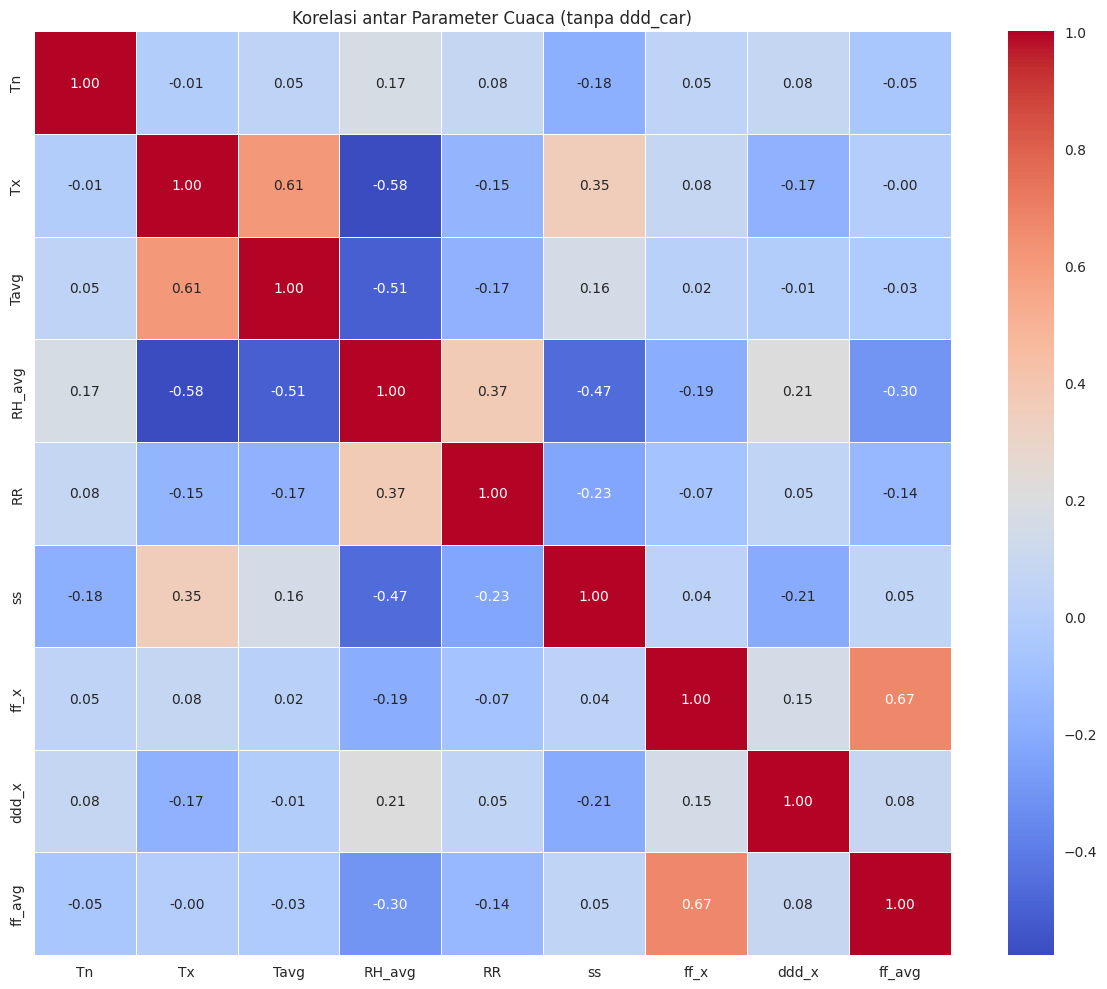

In [ ]:
# Buat list kolom numerik tanpa 'ddd_car'
kolom_korelasi = [col for col in kolom_numerik if col != 'ddd_car']

# Konversi kolom-kolom ke numeric untuk analisis korelasi
for col in kolom_korelasi:
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce')

# Hitung matriks korelasi
corr_matrix = df_all[kolom_korelasi].corr()

# Plot heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antar Parameter Cuaca (tanpa ddd_car)')
plt.tight_layout()
plt.show()

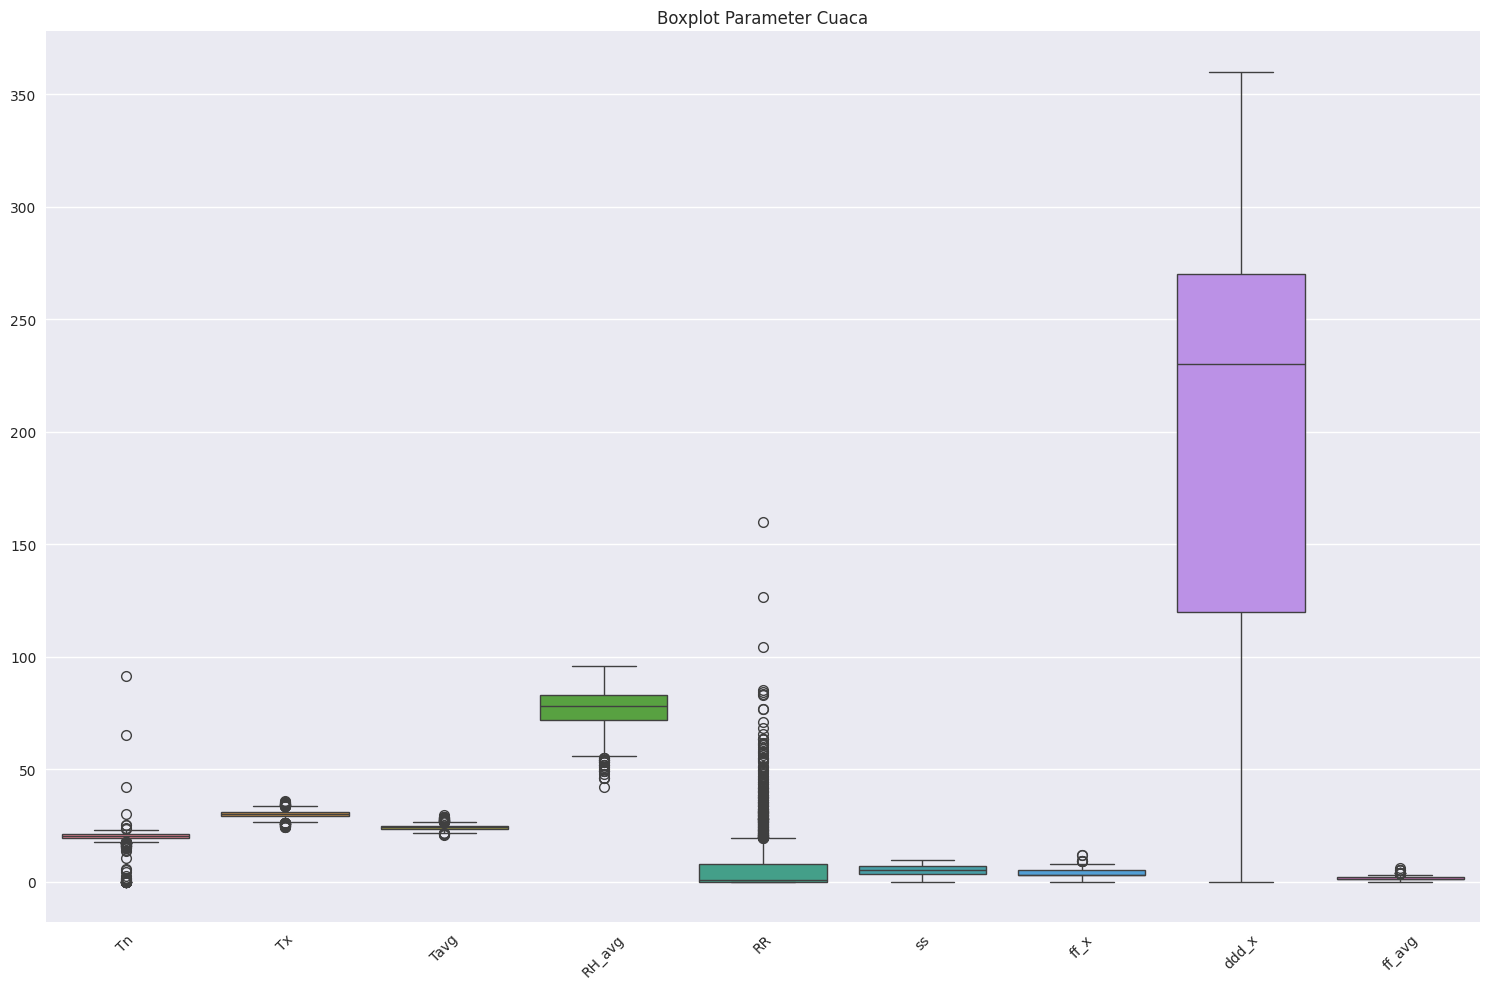

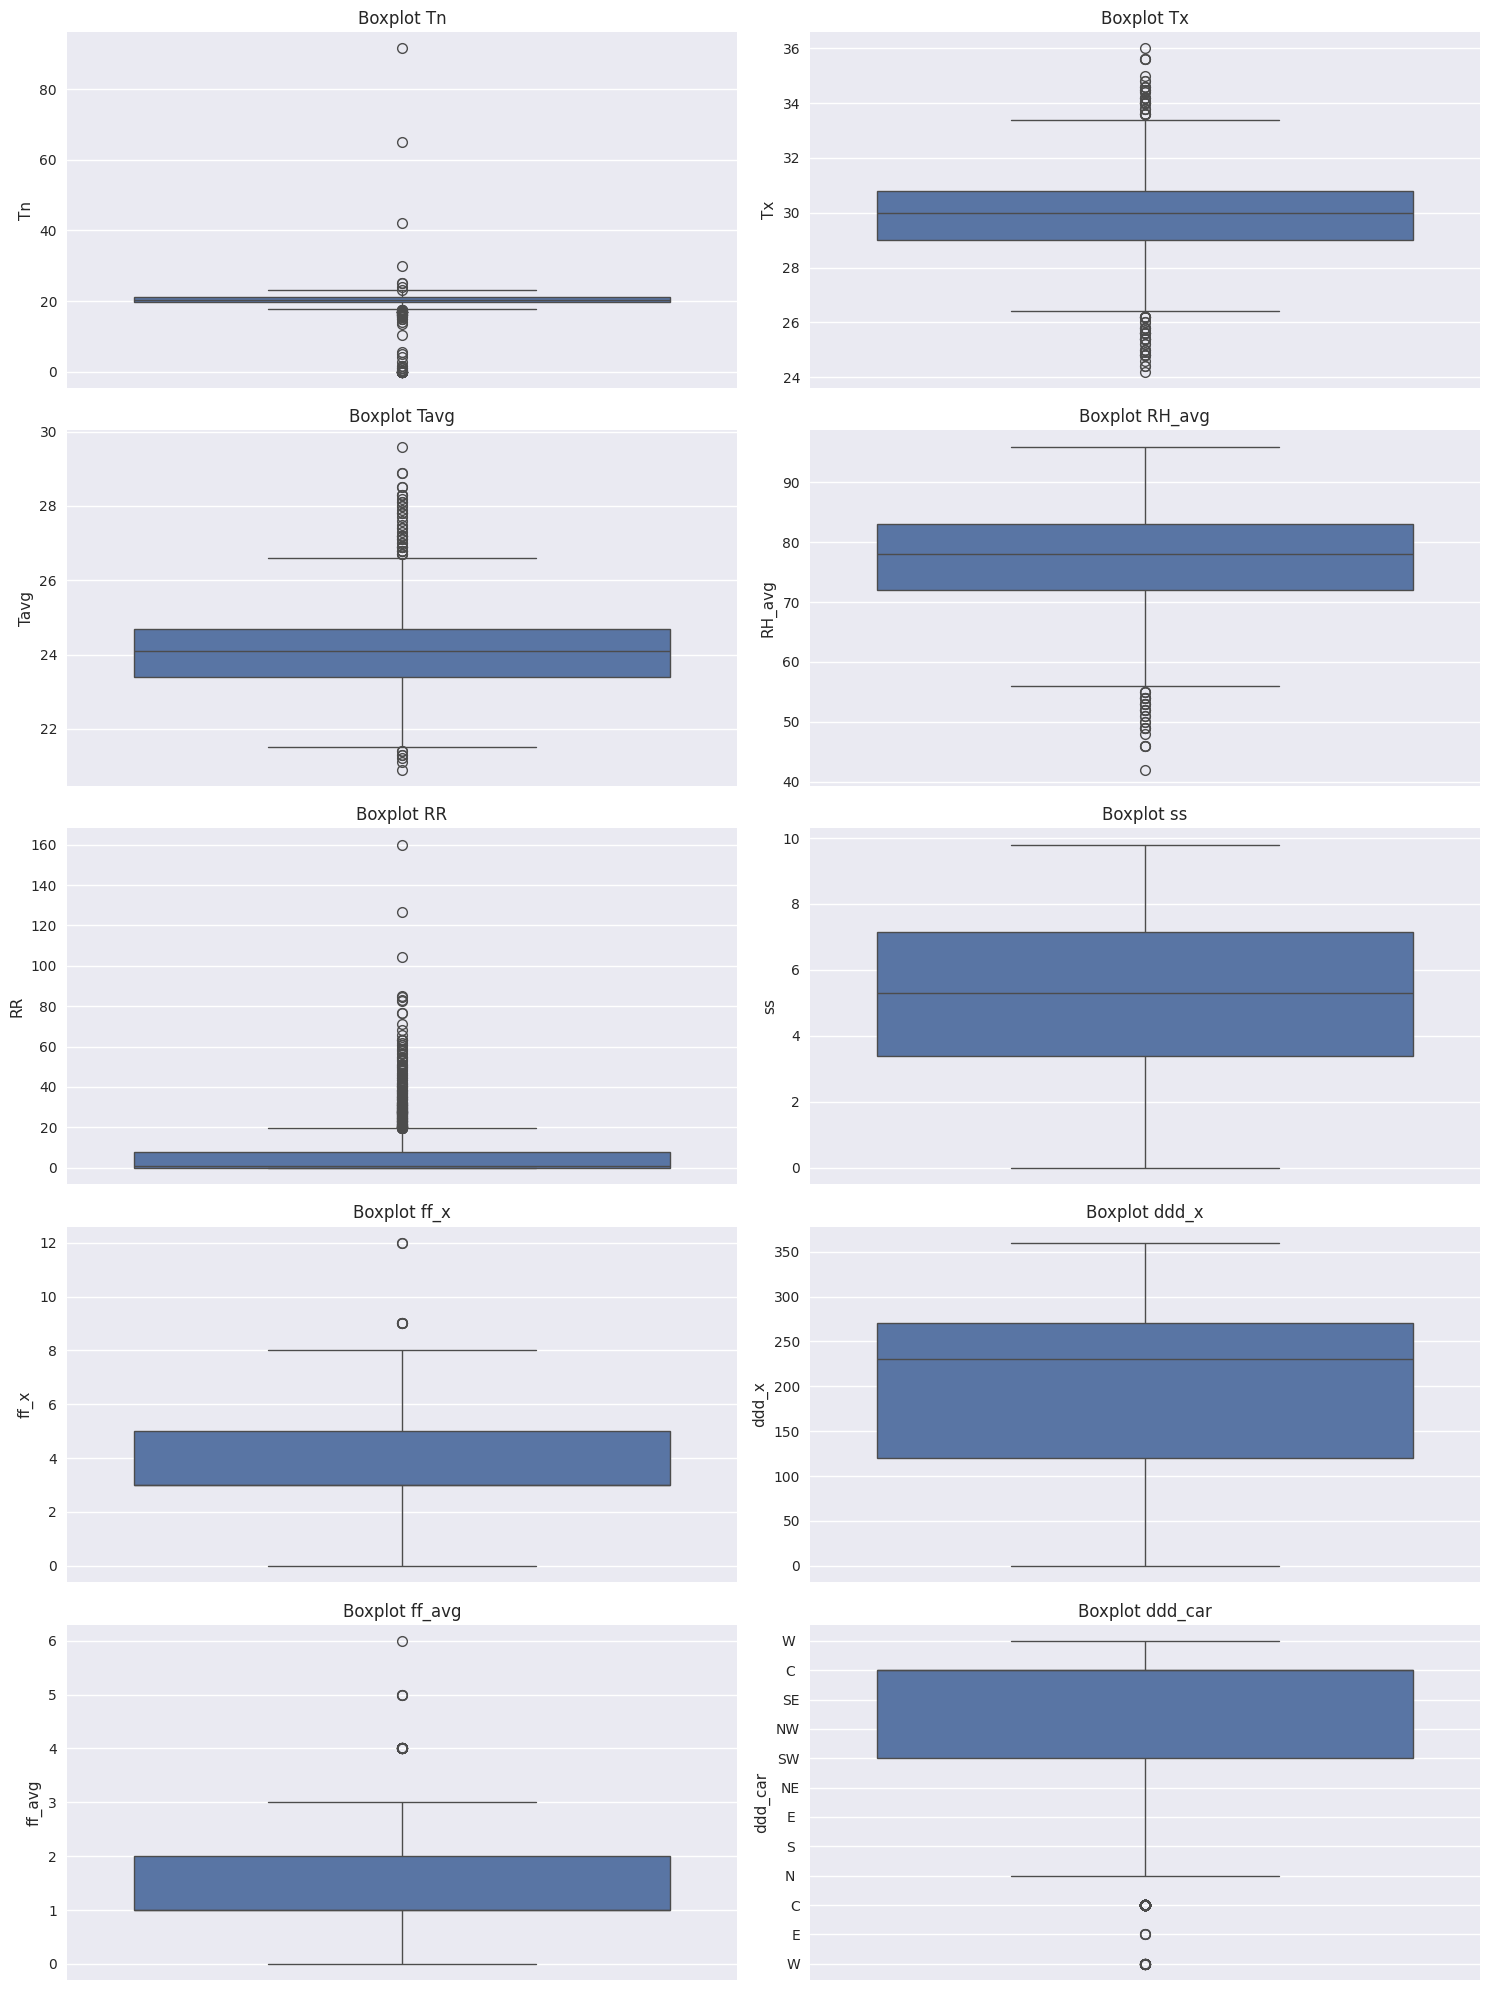

In [ ]:
# Visualisasi outlier dengan boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_all[kolom_numerik])
plt.title('Boxplot Parameter Cuaca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot untuk setiap parameter secara individual
plt.figure(figsize=(15, 20))
for i, col in enumerate(kolom_numerik):
    plt.subplot(5, 2, i+1)
    sns.boxplot(y=df_all[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

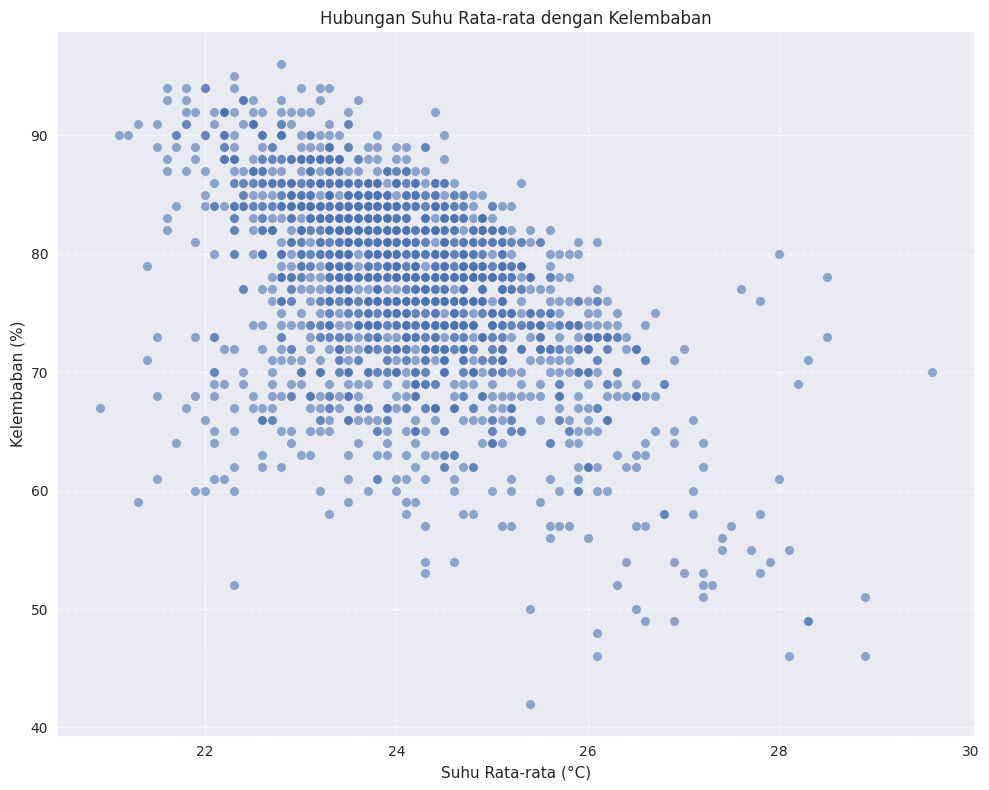

<Figure size 1500x1500 with 0 Axes>

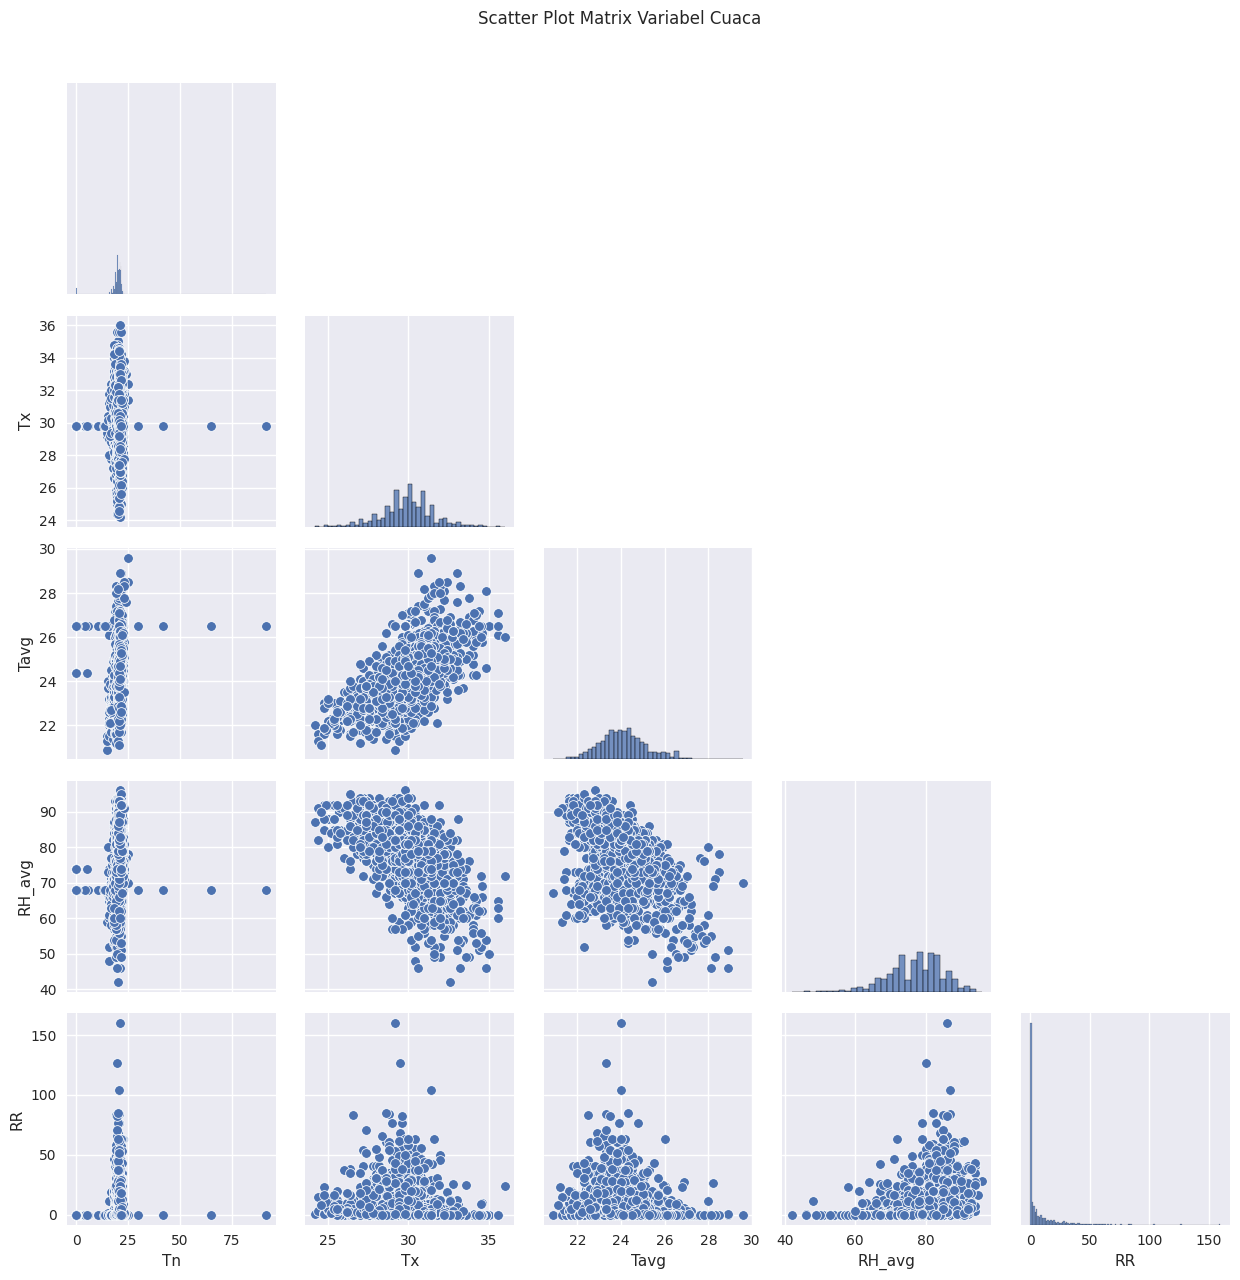

In [ ]:
# Plot scatter untuk melihat hubungan suhu dan kelembaban
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Tavg', y='RH_avg', data=df_all, alpha=0.6)
plt.title('Hubungan Suhu Rata-rata dengan Kelembaban')
plt.xlabel('Suhu Rata-rata (°C)')
plt.ylabel('Kelembaban (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Scatter plot matrix untuk beberapa variabel utama
plt.figure(figsize=(15, 15))
sns.pairplot(df_all[['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR']], corner=True)
plt.suptitle('Scatter Plot Matrix Variabel Cuaca', y=1.02)
plt.tight_layout()
plt.show()